# 🐄 Análisis integral de la producción Bovina en Argentina

---

## 📊 Dasboard de Rentabilidad Ganadera

### 🎯 Objetivos del Análisis 

- **Identificar** las provincias más rentables para la producción bobina
- **Análizar** factores clave que impactan la rentabilidad
- **Desarrollar** modelos predictivos para optimizar ingresos
- **Detectar** tendencias temporales y oportunidades de mejora

### 📈 Métricas clave a evaluar
| Métrica | Descripción | Unidad |
|---------|-------------|--------|
| 💰 **Ingreso Neto**  | Ganancia por hectárea | $/ha |
| 📊 **Eficiencia de Stock** | Productividad del ganado | % |
| 🎯 **Destete** | Tasa de supervivencia | % |
| ⚖️ **Carga Animal** | Densidad ganadera | kg/ha |
| 💸 **Costos totales** | Gastos directos + indirectos | $/ha |

---


## 🔧 Configuración del Entorno

Importamos las librerías necesarias para el análisis completo:

In [13]:
# ========================================
# 📚 LIBRERÍAS PARA ANÁLISIS DE DATOS
# ========================================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import warnings
from datetime import datetime

# Configuración visual mejorada
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Configuración de matplotlib para mejor calidad
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

print("🎨 Configuración visual completada")
print("📦 Todas las librerías cargadas exitosamente")
print("=" * 50)

🎨 Configuración visual completada
📦 Todas las librerías cargadas exitosamente


## 📂 Carga y exploración inicial de Datos

In [14]:
print("🔄 Cargando datos de producción bovina...")

df=pd.read_csv('produccion-de-carne-bovina.csv', encoding='latin-1')

print(f"✅ Datos cargados exitosamente")
print(f"📊 El conjunto de datos contiene: {df.shape[0]} filas y {df.shape[1]} columnas.")
print(f"📅 Período de análisis:", df['año'].min(), "a", df['año'].max())
print(f"🌎 Provincias incluidas: {df['provincia'].nunique()}")
print(f"🏛️ Departamentos incluidos:", df['departamento'].nunique())
print("=" * 60)


🔄 Cargando datos de producción bovina...
✅ Datos cargados exitosamente
📊 El conjunto de datos contiene: 2598 filas y 24 columnas.
📅 Período de análisis: 2015 a 2018
🌎 Provincias incluidas: 13
🏛️ Departamentos incluidos: 199


In [15]:
# ========================================
# 🔍 INFORMACIÓN DETALLADA DEL DATASET
# ========================================

print("📋 RESUMEN DEL DATASET")
print("=" * 50)
print(f"📊 Dimensiones: {df.shape[0]:,} filas × {df.shape[1]} columnas")
print(f"💾 Memoria utilizada: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("=" * 50)

# Información detallada de tipos de datos
print("\n📊 TIPOS DE DATOS Y VALORES NO NULOS")
print("-" * 50)
df_info = pd.DataFrame({
    'Columna': df.columns,
    'Tipo de Dato': df.dtypes,
    'Valores No Nulos': df.count(),
    'Valores Nulos': df.isnull().sum(),
    '% Completo': ((df.count() / len(df)) * 100).round(2)
})

# Mostrar la tabla formateada
for i, row in df_info.iterrows():
    completeness_bar = "█" * int(row['% Completo'] / 5) + "░" * (20 - int(row['% Completo'] / 5))
    print(f"{row['Columna']:<25} | {str(row['Tipo de Dato']):<12} | {row['Valores No Nulos']:>6} | {row['Valores Nulos']:>6} | {row['% Completo']:>6}% | {completeness_bar}")

print("=" * 50)

📋 RESUMEN DEL DATASET
📊 Dimensiones: 2,598 filas × 24 columnas
💾 Memoria utilizada: 1.36 MB

📊 TIPOS DE DATOS Y VALORES NO NULOS
--------------------------------------------------
pais_id                   | int64        |   2598 |      0 |  100.0% | ████████████████████
pais                      | object       |   2598 |      0 |  100.0% | ████████████████████
provincia_id              | int64        |   2598 |      0 |  100.0% | ████████████████████
provincia                 | object       |   2598 |      0 |  100.0% | ████████████████████
departamento_id           | int64        |   2598 |      0 |  100.0% | ████████████████████
departamento              | object       |   2598 |      0 |  100.0% | ████████████████████
prov_depto                | int64        |   2598 |      0 |  100.0% | ████████████████████
año                       | int64        |   2598 |      0 |  100.0% | ████████████████████
mes                       | int64        |   2598 |      0 |  100.0% | █████████████

In [16]:
# ========================================
# 👀 VISTA PREVIA DE LOS DATOS
# ========================================

print("🔍 PRIMERAS 5 FILAS DEL DATASET")
print("=" * 80)

# Configurar pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 20)

# Mostrar las primeras filas con mejor formato
display(df.head().style.set_properties(**{
    'background-color': '#f0f0f0',
    'color': 'black',
    'border-color': 'white'
}).set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#4CAF50'), ('color', 'white'), ('font-weight', 'bold')]},
    {'selector': 'td', 'props': [('text-align', 'center')]},
]))

print(f"\n📝 Mostrando las primeras 5 filas de {len(df):,} registros totales")

🔍 PRIMERAS 5 FILAS DEL DATASET


,pais_id,pais,provincia_id,provincia,departamento_id,departamento,prov_depto,año,mes,modelo,actividad,referencia,margen_bruto_($/ha),resultado_neto_($/ha),ingreso_neto_($/ha),gastos_directos_($/ha),costos_indirectos_($/ha),eficiencia_stock_(%),producción_(kg/ha),destete_(%),carga_(kg/ha),Unnamed: 21,Unnamed: 22,Unnamed: 23
0,32,Argentina,6,Buenos Aires,105,Bolivar,6105,2018,2,buenos aires centro-sudoeste,ciclo completo,http://www.agroindustria.gob.ar/sitio/areas/bovinos/modelos/,1766,-31,3497,1730,1797,35,117,69,336,nan,nan,nan
1,32,Argentina,6,Buenos Aires,231,Daireaux,6231,2018,2,buenos aires centro-sudoeste,ciclo completo,http://www.agroindustria.gob.ar/sitio/areas/bovinos/modelos/,1766,-31,3497,1730,1797,35,117,69,336,nan,nan,nan
2,32,Argentina,6,Buenos Aires,203,Coronel Suarez,6203,2018,2,buenos aires centro-sudoeste,ciclo completo,http://www.agroindustria.gob.ar/sitio/areas/bovinos/modelos/,1766,-31,3497,1730,1797,35,117,69,336,nan,nan,nan
3,32,Argentina,14,Cordoba,42,General San Martin,14042,2018,2,centro cordoba sur,ciclo completo,http://www.agroindustria.gob.ar/sitio/areas/bovinos/modelos/,2045,136,4589,2544,1909,36,157,65,436,nan,nan,nan
4,32,Argentina,14,Cordoba,56,Juarez Celman,14056,2018,2,centro cordoba sur,ciclo completo,http://www.agroindustria.gob.ar/sitio/areas/bovinos/modelos/,2045,136,4589,2544,1909,36,157,65,436,nan,nan,nan



📝 Mostrando las primeras 5 filas de 2,598 registros totales


🔍 ANÁLISIS DETALLADO DE VALORES NULOS
📊 RESUMEN GENERAL:
   • Total de valores nulos: 7,753
   • Porcentaje total de nulos: 12.43%
   • Columnas con valores nulos: 3/24
------------------------------------------------------------
🚨 COLUMNAS CON VALORES FALTANTES:
------------------------------------------------------------
   Unnamed: 21               |     2598 | 100.00% | ██████████████████████████████████████████████████
   Unnamed: 22               |     2598 | 100.00% | ██████████████████████████████████████████████████
   Unnamed: 23               |     2557 |  98.42% | █████████████████████████████████████████████████░


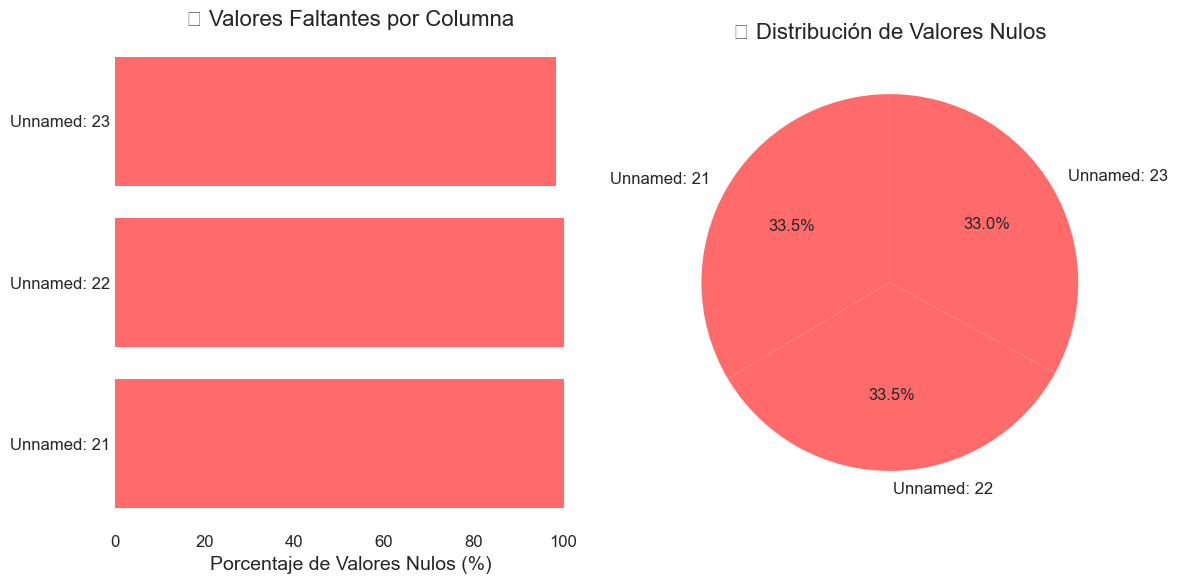

In [17]:
# ========================================
# 🚨 ANÁLISIS DE VALORES FALTANTES
# ========================================

print("🔍 ANÁLISIS DETALLADO DE VALORES NULOS")
print("=" * 60)

# Calcular estadísticas de valores nulos
null_counts = df.isnull().sum()
null_percentage = (null_counts / len(df)) * 100
total_nulls = null_counts.sum()

# Crear resumen general
print(f"📊 RESUMEN GENERAL:")
print(f"   • Total de valores nulos: {total_nulls:,}")
print(f"   • Porcentaje total de nulos: {(total_nulls / (len(df) * len(df.columns))) * 100:.2f}%")
print(f"   • Columnas con valores nulos: {(null_counts > 0).sum()}/{len(df.columns)}")
print("-" * 60)

# Mostrar solo columnas con valores nulos
if total_nulls > 0:
    print("🚨 COLUMNAS CON VALORES FALTANTES:")
    print("-" * 60)
    
    missing_data = pd.DataFrame({
        'Columna': null_counts.index,
        'Valores Nulos': null_counts.values,
        'Porcentaje': null_percentage.values
    })
    
    # Filtrar solo columnas con valores nulos
    missing_data = missing_data[missing_data['Valores Nulos'] > 0].sort_values('Valores Nulos', ascending=False)
    
    if not missing_data.empty:
        for _, row in missing_data.iterrows():
            bar_length = int(row['Porcentaje'] / 2)  # Escala para barras de 50 caracteres max
            progress_bar = "█" * bar_length + "░" * (50 - bar_length)
            print(f"   {row['Columna']:<25} | {row['Valores Nulos']:>8} | {row['Porcentaje']:>6.2f}% | {progress_bar}")
    
    # Visualización con matplotlib
    if not missing_data.empty:
        plt.figure(figsize=(12, 6))
        colors = ['#FF6B6B' if x > 50 else '#FFA500' if x > 20 else '#4ECDC4' for x in missing_data['Porcentaje']]
        
        plt.subplot(1, 2, 1)
        plt.barh(missing_data['Columna'], missing_data['Porcentaje'], color=colors)
        plt.xlabel('Porcentaje de Valores Nulos (%)')
        plt.title('🚨 Valores Faltantes por Columna')
        plt.grid(axis='x', alpha=0.3)
        
        plt.subplot(1, 2, 2)
        plt.pie(missing_data['Valores Nulos'], labels=missing_data['Columna'], autopct='%1.1f%%', 
                colors=colors, startangle=90)
        plt.title('📊 Distribución de Valores Nulos')
        
        plt.tight_layout()
        plt.show()
else:
    print("✅ ¡EXCELENTE! No se encontraron valores nulos en el dataset")
    print("   El dataset está completo y listo para el análisis")

print("=" * 60)

In [18]:
# ========================================
# 🧹 LIMPIEZA Y PREPROCESAMIENTO DE DATOS
# ========================================

print("🔧 PROCESO DE LIMPIEZA DE DATOS")
print("=" * 50)

# Identificar columnas problemáticas antes de la limpieza
columnas_originales = df.columns.tolist()
print(f"📊 Columnas originales: {len(columnas_originales)}")

# Identificar columnas con nombres problemáticos (Unnamed)
columnas_unnamed = [col for col in df.columns if 'Unnamed' in str(col)]
print(f"🚨 Columnas 'Unnamed' encontradas: {len(columnas_unnamed)}")

if columnas_unnamed:
    print("   Columnas a eliminar:")
    for col in columnas_unnamed:
        null_count = df[col].isnull().sum()
        null_percentage = (null_count / len(df)) * 100
        print(f"   • {col}: {null_count:,} nulos ({null_percentage:.1f}%)")
    
    # Eliminar columnas problemáticas
    df_cleaned = df.drop(columns=columnas_unnamed)
    print(f"\n✅ Columnas eliminadas exitosamente")
else:
    df_cleaned = df.copy()
    print("✅ No se encontraron columnas problemáticas para eliminar")

print(f"📊 Columnas después de limpieza: {len(df_cleaned.columns)}")
print(f"📉 Reducción de columnas: {len(columnas_originales) - len(df_cleaned.columns)}")

# Verificar el estado después de la limpieza
print("\n🔍 VERIFICACIÓN POST-LIMPIEZA:")
print("-" * 30)
remaining_nulls = df_cleaned.isnull().sum().sum()
print(f"💧 Valores nulos restantes: {remaining_nulls:,}")

if remaining_nulls == 0:
    print("🎉 ¡PERFECTO! Dataset completamente limpio")
else:
    print("⚠️  Aún quedan algunos valores nulos para revisar")

# Asignar el dataframe limpio para uso posterior
df1 = df_cleaned.copy()
print(f"\n✅ Dataset limpio guardado como 'df1' con {df1.shape[0]:,} filas y {df1.shape[1]} columnas")
print("=" * 50)

🔧 PROCESO DE LIMPIEZA DE DATOS
📊 Columnas originales: 24
🚨 Columnas 'Unnamed' encontradas: 3
   Columnas a eliminar:
   • Unnamed: 21: 2,598 nulos (100.0%)
   • Unnamed: 22: 2,598 nulos (100.0%)
   • Unnamed: 23: 2,557 nulos (98.4%)

✅ Columnas eliminadas exitosamente
📊 Columnas después de limpieza: 21
📉 Reducción de columnas: 3

🔍 VERIFICACIÓN POST-LIMPIEZA:
------------------------------
💧 Valores nulos restantes: 0
🎉 ¡PERFECTO! Dataset completamente limpio

✅ Dataset limpio guardado como 'df1' con 2,598 filas y 21 columnas


In [19]:
# ========================================
# ✨ DATASET LIMPIO - VISTA PREVIA
# ========================================

print("🎯 DATASET DESPUÉS DE LA LIMPIEZA")
print("=" * 60)

# Mostrar estadísticas del dataset limpio
print(f"📊 Dimensiones finales: {df1.shape[0]:,} filas × {df1.shape[1]} columnas")
print(f"🧮 Tipos de datos únicos: {df1.dtypes.value_counts().to_dict()}")
print(f"💾 Memoria utilizada: {df1.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("-" * 60)

# Vista previa mejorada del dataset limpio
print("🔍 PRIMERAS 5 FILAS DEL DATASET LIMPIO:")

# Aplicar estilo mejorado
styled_df = df1.head().style.set_properties(**{
    'background-color': '#f8f9fa',
    'color': '#2c3e50',
    'border': '1px solid #dee2e6',
    'text-align': 'center',
    'font-size': '12px'
}).set_table_styles([
    {'selector': 'thead th', 'props': [
        ('background-color', '#28a745'),
        ('color', 'white'),
        ('font-weight', 'bold'),
        ('text-align', 'center'),
        ('border', '1px solid white')
    ]},
    {'selector': 'tbody tr:nth-child(even)', 'props': [
        ('background-color', '#f2f2f2')
    ]},
    {'selector': 'tbody tr:hover', 'props': [
        ('background-color', '#e8f5e8')
    ]}
])

display(styled_df)

print(f"\n📝 Vista previa completa del dataset limpio y procesado")
print("🚀 ¡Listo para análisis avanzados!")

🎯 DATASET DESPUÉS DE LA LIMPIEZA
📊 Dimensiones finales: 2,598 filas × 21 columnas
🧮 Tipos de datos únicos: {dtype('int64'): 15, dtype('O'): 6}
💾 Memoria utilizada: 1.30 MB
------------------------------------------------------------
🔍 PRIMERAS 5 FILAS DEL DATASET LIMPIO:


,pais_id,pais,provincia_id,provincia,departamento_id,departamento,prov_depto,año,mes,modelo,actividad,referencia,margen_bruto_($/ha),resultado_neto_($/ha),ingreso_neto_($/ha),gastos_directos_($/ha),costos_indirectos_($/ha),eficiencia_stock_(%),producción_(kg/ha),destete_(%),carga_(kg/ha)
0,32,Argentina,6,Buenos Aires,105,Bolivar,6105,2018,2,buenos aires centro-sudoeste,ciclo completo,http://www.agroindustria.gob.ar/sitio/areas/bovinos/modelos/,1766,-31,3497,1730,1797,35,117,69,336
1,32,Argentina,6,Buenos Aires,231,Daireaux,6231,2018,2,buenos aires centro-sudoeste,ciclo completo,http://www.agroindustria.gob.ar/sitio/areas/bovinos/modelos/,1766,-31,3497,1730,1797,35,117,69,336
2,32,Argentina,6,Buenos Aires,203,Coronel Suarez,6203,2018,2,buenos aires centro-sudoeste,ciclo completo,http://www.agroindustria.gob.ar/sitio/areas/bovinos/modelos/,1766,-31,3497,1730,1797,35,117,69,336
3,32,Argentina,14,Cordoba,42,General San Martin,14042,2018,2,centro cordoba sur,ciclo completo,http://www.agroindustria.gob.ar/sitio/areas/bovinos/modelos/,2045,136,4589,2544,1909,36,157,65,436
4,32,Argentina,14,Cordoba,56,Juarez Celman,14056,2018,2,centro cordoba sur,ciclo completo,http://www.agroindustria.gob.ar/sitio/areas/bovinos/modelos/,2045,136,4589,2544,1909,36,157,65,436



📝 Vista previa completa del dataset limpio y procesado
🚀 ¡Listo para análisis avanzados!


## 💰 Análisis de rentabilidad por provincia

### Dasboard de ingresos y costos

#### Exploramos la distribución de ingresos, gastos y rentablidad a nivel provincial:

Procesando datos...
Creando visualización corregida...


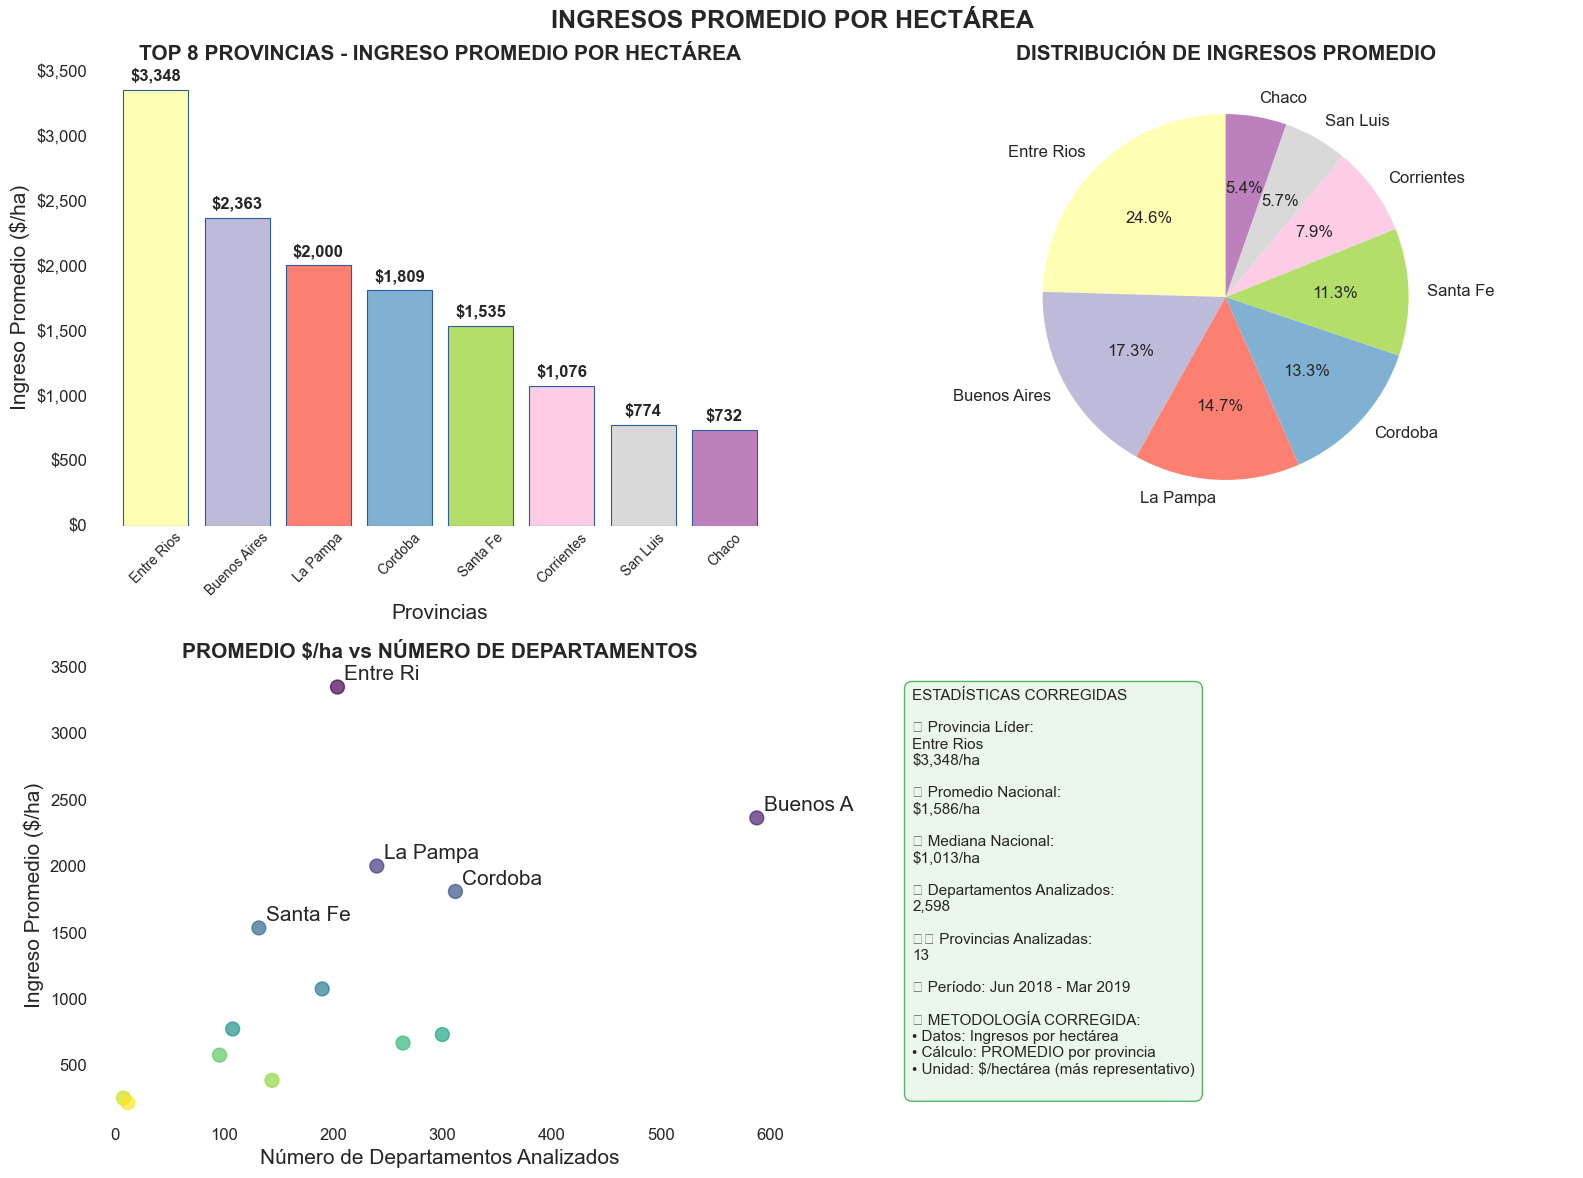

✅ Dashboard  completado

           RESUMEN EJECUTIVO CORREGIDO - INGRESOS PROMEDIO            
🏆 Provincia más rentable: Entre Rios
💰 Ingreso promedio líder: $3,348/ha
📊 Promedio nacional: $1,586/ha
📈 Mediana nacional: $1,013/ha
🗺️ Provincias analizadas: 13
🌾 Departamentos analizados: 2,598

🔝 TOP 5 PROVINCIAS (Ingreso Promedio por Hectárea):
   1. Entre Rios: $3,348/ha (204 depts)
   2. Buenos Aires: $2,363/ha (588 depts)
   3. La Pampa: $2,000/ha (240 depts)
   4. Cordoba: $1,809/ha (312 depts)
   5. Santa Fe: $1,535/ha (132 depts)

💡 INTERPRETACIÓN CORRECTA:
   • Los valores ahora representan INGRESOS PROMEDIO por hectárea
   • Cada provincia se evalúa por su rentabilidad promedio
   • Se considera el número de departamentos para evaluar representatividad
   • Rangos: $205 - $5980 por hectárea


In [20]:
#  INGRESOS PROMEDIO POR HECTÁREA POR PROVINCIA

print("Procesando datos...")

# Calcular PROMEDIOS en lugar de sumas
avg_ganancias = df.groupby('provincia')['ingreso_neto_($/ha)'].mean().reset_index()
avg_ganancias = avg_ganancias.sort_values('ingreso_neto_($/ha)', ascending=False)
avg_ganancias.columns = ['provincia', 'promedio_por_ha']

# También calcular otras estadísticas útiles por provincia
stats_provincia = df.groupby('provincia').agg({
    'ingreso_neto_($/ha)': ['mean', 'median', 'std', 'count'],
    'gastos_directos_($/ha)': 'mean',
    'costos_indirectos_($/ha)': 'mean'
}).round(2)

# Aplanar los nombres de columnas
stats_provincia.columns = ['_'.join(col).strip() for col in stats_provincia.columns]
stats_provincia = stats_provincia.reset_index()

# Función para formatear números
def format_currency(value):
    if value >= 1_000:
        return f"${value:,.0f}"
    else:
        return f"${value:.0f}"

print("Creando visualización corregida...")

# Configuración de la figura
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('INGRESOS PROMEDIO POR HECTÁREA', fontsize=18, fontweight='bold')

# Gráfico de barras principal - PROMEDIOS (TOP 8)
colors_vibrant = plt.cm.Set3(np.linspace(0.1, 0.8, 8))
top8_avg = avg_ganancias.head(8)
bars = ax1.bar(top8_avg['provincia'], top8_avg['promedio_por_ha'], 
               color=colors_vibrant, edgecolor='#2c5aa0', linewidth=0.8)

ax1.set_title('TOP 8 PROVINCIAS - INGRESO PROMEDIO POR HECTÁREA', fontsize=15, fontweight='bold')
ax1.set_xlabel('Provincias', fontsize=15)
ax1.set_ylabel('Ingreso Promedio ($/ha)', fontsize=15)
ax1.tick_params(axis='x', rotation=45, labelsize=10)
ax1.grid(axis='y', alpha=0.3)
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format_currency(x)))

# Agregar valores en las barras
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 50,
             format_currency(height), ha='center', va='bottom', fontweight='bold', fontsize=12)

# Gráfico circular - distribución de promedios
pie_data = top8_avg['promedio_por_ha']
pie_labels = top8_avg['provincia']
pie_colors = colors_vibrant[:len(pie_data)]

ax2.pie(pie_data, labels=pie_labels, autopct='%1.1f%%', 
        colors=pie_colors, startangle=90, textprops={'fontsize': 12})
ax2.set_title('DISTRIBUCIÓN DE INGRESOS PROMEDIO', fontsize=15, fontweight='bold')

# Gráfico de dispersión - Promedio vs Número de registros
merged_data = avg_ganancias.merge(
    df.groupby('provincia').size().reset_index(name='num_registros'), 
    on='provincia'
)

scatter = ax3.scatter(merged_data['num_registros'], merged_data['promedio_por_ha'], 
                     c=range(len(merged_data)), cmap='viridis', s=100, alpha=0.7)
ax3.set_title('PROMEDIO $/ha vs NÚMERO DE DEPARTAMENTOS', fontsize=15, fontweight='bold')
ax3.set_xlabel('Número de Departamentos Analizados', fontsize=15)
ax3.set_ylabel('Ingreso Promedio ($/ha)', fontsize=15)
ax3.grid(True, alpha=0.3)

# Agregar etiquetas a los puntos más importantes
for i, row in merged_data.head(5).iterrows():
    ax3.annotate(row['provincia'][:8], (row['num_registros'], row['promedio_por_ha']),
                xytext=(5, 5), textcoords='offset points', fontsize=15)

# Panel de estadísticas CORREGIDO
ax4.axis('off')

# Calcular estadísticas correctas
promedio_nacional = df['ingreso_neto_($/ha)'].mean()
mediana_nacional = df['ingreso_neto_($/ha)'].median()
lider_provincia = avg_ganancias.iloc[0]['provincia']
lider_promedio = avg_ganancias.iloc[0]['promedio_por_ha']
total_departamentos = len(df)
total_provincias = len(avg_ganancias)

stats_text = f"""ESTADÍSTICAS CORREGIDAS

🏆 Provincia Líder:
{lider_provincia}
{format_currency(lider_promedio)}/ha

📊 Promedio Nacional:
{format_currency(promedio_nacional)}/ha

📈 Mediana Nacional:
{format_currency(mediana_nacional)}/ha

🌾 Departamentos Analizados:
{total_departamentos:,}

🗺️ Provincias Analizadas:
{total_provincias}

📅 Período: Jun 2018 - Mar 2019

✅ METODOLOGÍA CORREGIDA:
• Datos: Ingresos por hectárea
• Cálculo: PROMEDIO por provincia
• Unidad: $/hectárea (más representativo)
"""

ax4.text(0.05, 0.95, stats_text, transform=ax4.transAxes, fontsize=11,
         verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', 
         facecolor='#e8f5e8', alpha=0.8, edgecolor='#28a745'))

plt.tight_layout()
plt.show()

print("✅ Dashboard  completado")

# Resumen estadístico CORREGIDO
print("\n" + "="*70)
print("RESUMEN EJECUTIVO CORREGIDO - INGRESOS PROMEDIO".center(70))
print("="*70)

print(f"🏆 Provincia más rentable: {lider_provincia}")
print(f"💰 Ingreso promedio líder: {format_currency(lider_promedio)}/ha")
print(f"📊 Promedio nacional: {format_currency(promedio_nacional)}/ha")
print(f"📈 Mediana nacional: {format_currency(mediana_nacional)}/ha")
print(f"🗺️ Provincias analizadas: {total_provincias}")
print(f"🌾 Departamentos analizados: {total_departamentos:,}")

print(f"\n🔝 TOP 5 PROVINCIAS (Ingreso Promedio por Hectárea):")
for i, (_, row) in enumerate(avg_ganancias.head(5).iterrows(), 1):
    registros = df[df['provincia'] == row['provincia']].shape[0]
    print(f"   {i}. {row['provincia']}: {format_currency(row['promedio_por_ha'])}/ha ({registros} depts)")

print(f"\n💡 INTERPRETACIÓN CORRECTA:")
print(f"   • Los valores ahora representan INGRESOS PROMEDIO por hectárea")
print(f"   • Cada provincia se evalúa por su rentabilidad promedio")
print(f"   • Se considera el número de departamentos para evaluar representatividad")
print(f"   • Rangos: ${df['ingreso_neto_($/ha)'].min():.0f} - ${df['ingreso_neto_($/ha)'].max():.0f} por hectárea")

print("="*70)

## 💸 Análisis de Gastos Directos e Indirectos por Provincia

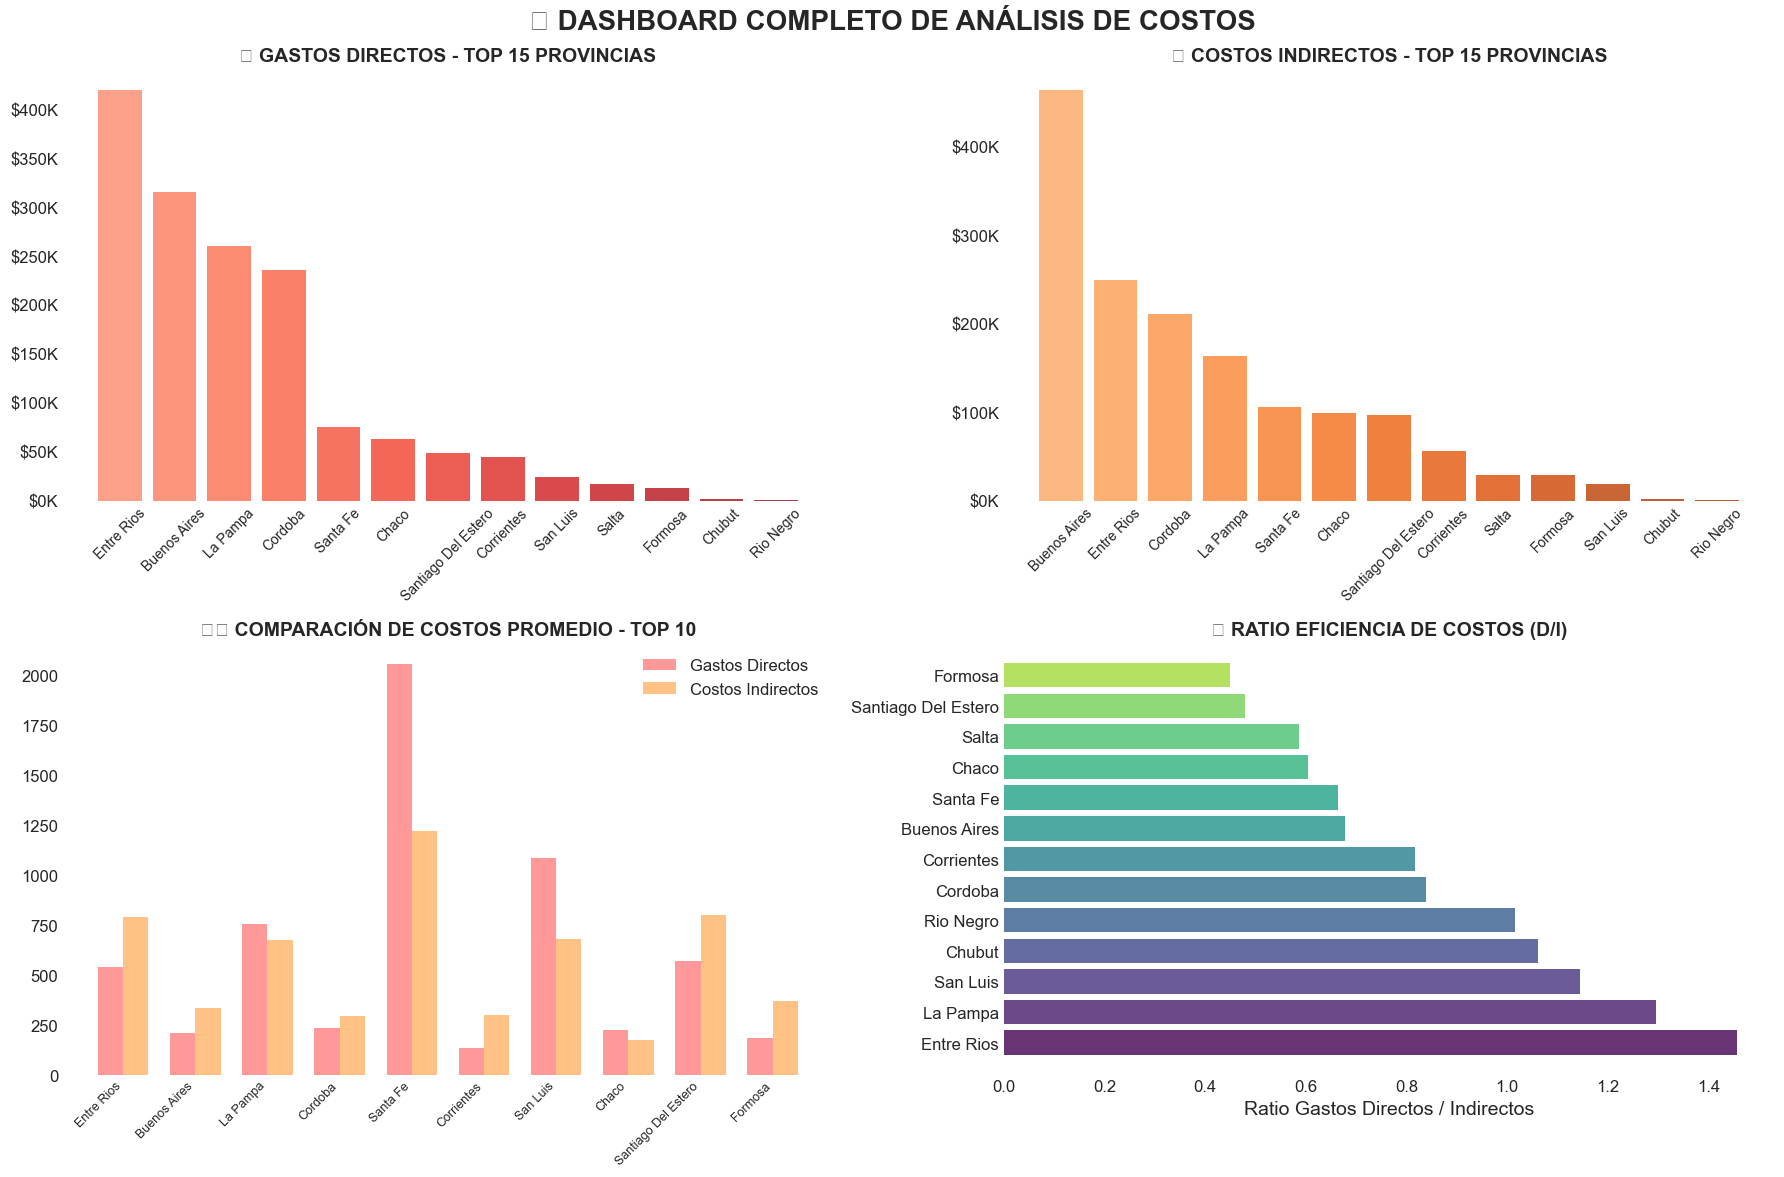

📈 INSIGHTS DE COSTOS:
💸 Mayor gasto directo: Entre Rios ($419,901)
🏢 Mayor costo indirecto: Buenos Aires ($464,354)
⚖️ Mejor ratio D/I: Entre Rios (1.46)


In [21]:
# 💸 ANÁLISIS DE GASTOS DIRECTOS POR PROVINCIA
sum_gastos = df.groupby('provincia')['gastos_directos_($/ha)'].sum().reset_index()
sum_gastos = sum_gastos.sort_values('gastos_directos_($/ha)', ascending=False)

# Crear dashboard de costos
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 12))

# 1. Gastos Directos
colors_gastos = plt.cm.Reds(np.linspace(0.4, 0.9, len(sum_gastos)))
ax1.bar(sum_gastos['provincia'][:15], sum_gastos['gastos_directos_($/ha)'][:15], 
        color=colors_gastos[:15], alpha=0.8)
ax1.set_title('💸 GASTOS DIRECTOS - TOP 15 PROVINCIAS', fontsize=14, fontweight='bold')
ax1.tick_params(axis='x', rotation=45, labelsize=10)
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))
ax1.grid(axis='y', alpha=0.3)

# 2. Gastos Indirectos
sum_gastos_indirectos = df.groupby('provincia')['costos_indirectos_($/ha)'].sum().reset_index()
sum_gastos_indirectos = sum_gastos_indirectos.sort_values('costos_indirectos_($/ha)', ascending=False)
colors_indirectos = plt.cm.Oranges(np.linspace(0.4, 0.9, len(sum_gastos_indirectos)))

ax2.bar(sum_gastos_indirectos['provincia'][:15], sum_gastos_indirectos['costos_indirectos_($/ha)'][:15], 
        color=colors_indirectos[:15], alpha=0.8)
ax2.set_title('🏢 COSTOS INDIRECTOS - TOP 15 PROVINCIAS', fontsize=14, fontweight='bold')
ax2.tick_params(axis='x', rotation=45, labelsize=10)
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))
ax2.grid(axis='y', alpha=0.3)

# 3. Comparación Costos Directos vs Indirectos (TOP 10)
top_10_provincias = avg_ganancias['provincia'][:10]
gastos_dir_top10 = df[df['provincia'].isin(top_10_provincias)].groupby('provincia')['gastos_directos_($/ha)'].mean()
gastos_ind_top10 = df[df['provincia'].isin(top_10_provincias)].groupby('provincia')['costos_indirectos_($/ha)'].mean()

x = np.arange(len(top_10_provincias))
width = 0.35

ax3.bar(x - width/2, gastos_dir_top10, width, label='Gastos Directos', color='#ff7f7f', alpha=0.8)
ax3.bar(x + width/2, gastos_ind_top10, width, label='Costos Indirectos', color='#ffb366', alpha=0.8)
ax3.set_title('⚖️ COMPARACIÓN DE COSTOS PROMEDIO - TOP 10', fontsize=14, fontweight='bold')
ax3.set_xticks(x)
ax3.set_xticklabels(top_10_provincias, rotation=45, ha='right', fontsize=9)
ax3.legend()
ax3.grid(axis='y', alpha=0.3)

# 4. Eficiencia de Costos (Ratio Directo/Indirecto)
df['ratio_costos'] = df['gastos_directos_($/ha)'] / (df['costos_indirectos_($/ha)'] + 1)  # +1 para evitar división por 0
ratio_promedio = df.groupby('provincia')['ratio_costos'].mean().sort_values(ascending=False)

ax4.barh(ratio_promedio.index[:15], ratio_promedio.values[:15], 
         color=plt.cm.viridis(np.linspace(0, 1, 15)), alpha=0.8)
ax4.set_title('📊 RATIO EFICIENCIA DE COSTOS (D/I)', fontsize=14, fontweight='bold')
ax4.set_xlabel('Ratio Gastos Directos / Indirectos')
ax4.grid(axis='x', alpha=0.3)

plt.suptitle('💰 DASHBOARD COMPLETO DE ANÁLISIS DE COSTOS', fontsize=20, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

print("📈 INSIGHTS DE COSTOS:")
print(f"💸 Mayor gasto directo: {sum_gastos.iloc[0]['provincia']} (${sum_gastos.iloc[0]['gastos_directos_($/ha)']:,.0f})")
print(f"🏢 Mayor costo indirecto: {sum_gastos_indirectos.iloc[0]['provincia']} (${sum_gastos_indirectos.iloc[0]['costos_indirectos_($/ha)']:,.0f})")
print(f"⚖️ Mejor ratio D/I: {ratio_promedio.index[0]} ({ratio_promedio.iloc[0]:.2f})")
print("=" * 60)

🚀 Entrenando modelo de regresión lineal...


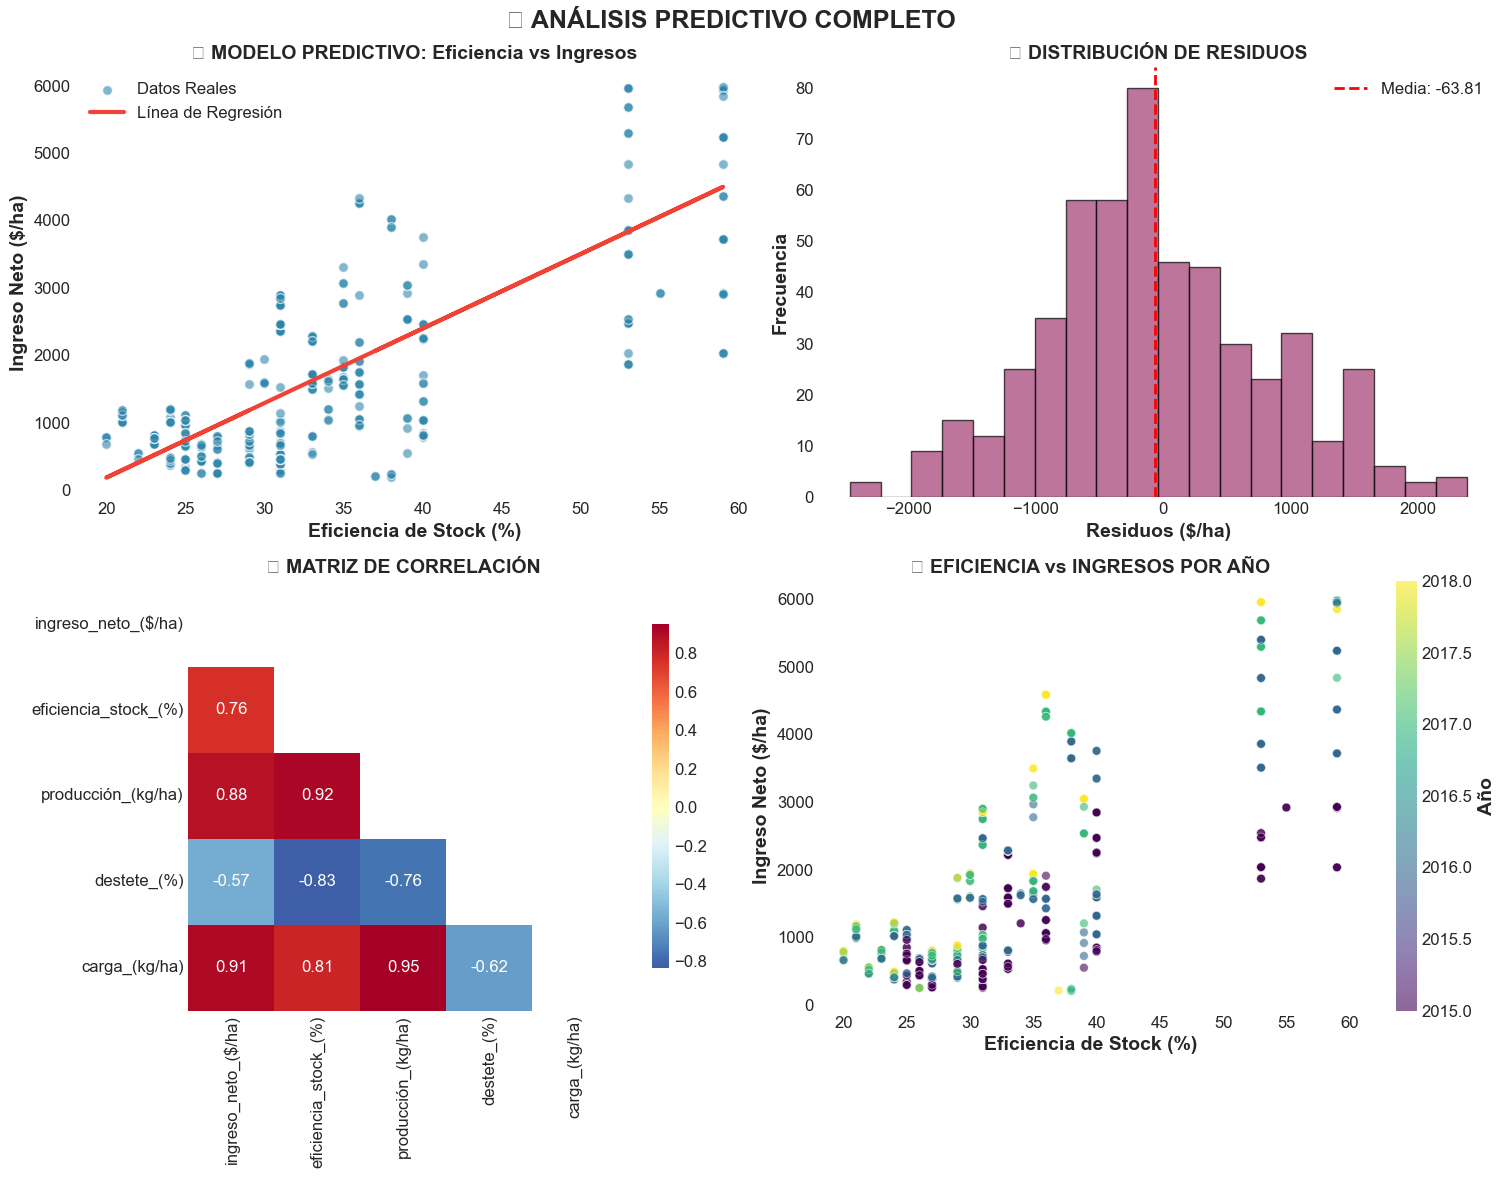

🏆 RESULTADOS DEL MODELO PREDICTIVO
📊 Error Cuadrático Medio (MSE): 757,538.29
📈 Coeficiente de Determinación (R²): 0.565
🎯 Precisión del modelo: 56.5%
🔧 Coeficiente de regresión: 110.50
📍 Intercepto: -2021.00
⚠️ BUENO: Modelo con capacidad predictiva moderada


In [22]:
# 🎯 MODELO PREDICTIVO INICIAL: EFICIENCIA DE STOCK → INGRESOS
print("🚀 Entrenando modelo de regresión lineal...")

# Preparar datos
X = df[['eficiencia_stock_(%)']]
y = df['ingreso_neto_($/ha)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Métricas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Visualización profesional
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Datos reales vs Predicciones
ax1.scatter(X_test, y_test, color='#2E86AB', alpha=0.6, s=50, label='Datos Reales', edgecolors='white')
ax1.plot(X_test, y_pred, color='#F24236', linewidth=3, label='Línea de Regresión')
ax1.set_title('🎯 MODELO PREDICTIVO: Eficiencia vs Ingresos', fontsize=14, fontweight='bold')
ax1.set_xlabel('Eficiencia de Stock (%)', fontweight='bold')
ax1.set_ylabel('Ingreso Neto ($/ha)', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Residuos
residuos = y_test - y_pred
ax2.hist(residuos, bins=20, color='#A23B72', alpha=0.7, edgecolor='black')
ax2.axvline(residuos.mean(), color='red', linestyle='--', linewidth=2, label=f'Media: {residuos.mean():.2f}')
ax2.set_title('📊 DISTRIBUCIÓN DE RESIDUOS', fontsize=14, fontweight='bold')
ax2.set_xlabel('Residuos ($/ha)', fontweight='bold')
ax2.set_ylabel('Frecuencia', fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Correlación mejorada
correlation_matrix = df[['ingreso_neto_($/ha)', 'eficiencia_stock_(%)', 'producción_(kg/ha)', 
                        'destete_(%)', 'carga_(kg/ha)']].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdYlBu_r', center=0,
            square=True, ax=ax3, cbar_kws={"shrink": .8})
ax3.set_title('🔥 MATRIZ DE CORRELACIÓN', fontsize=14, fontweight='bold')

# 4. Scatter plot con provincias
provinces_sample = df.sample(n=min(1000, len(df)))  # Muestra para mejor visualización
scatter = ax4.scatter(provinces_sample['eficiencia_stock_(%)'], 
                     provinces_sample['ingreso_neto_($/ha)'],
                     c=provinces_sample['año'], cmap='viridis', 
                     alpha=0.6, s=40, edgecolors='white', linewidth=0.5)
ax4.set_title('🌈 EFICIENCIA vs INGRESOS POR AÑO', fontsize=14, fontweight='bold')
ax4.set_xlabel('Eficiencia de Stock (%)', fontweight='bold')
ax4.set_ylabel('Ingreso Neto ($/ha)', fontweight='bold')
cbar = plt.colorbar(scatter, ax=ax4)
cbar.set_label('Año', fontweight='bold')
ax4.grid(True, alpha=0.3)

plt.suptitle('🤖 ANÁLISIS PREDICTIVO COMPLETO', fontsize=18, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

# Resultados con estilo
print("=" * 60)
print("🏆 RESULTADOS DEL MODELO PREDICTIVO")
print("=" * 60)
print(f"📊 Error Cuadrático Medio (MSE): {mse:,.2f}")
print(f"📈 Coeficiente de Determinación (R²): {r2:.3f}")
print(f"🎯 Precisión del modelo: {r2*100:.1f}%")
print(f"🔧 Coeficiente de regresión: {model.coef_[0]:.2f}")
print(f"📍 Intercepto: {model.intercept_:.2f}")

if r2 > 0.7:
    print("✅ EXCELENTE: Modelo con alta capacidad predictiva")
elif r2 > 0.5:
    print("⚠️ BUENO: Modelo con capacidad predictiva moderada")
else:
    print("❌ MEJORABLE: Considerar variables adicionales")
    
print("=" * 60)

## 🤖 MODELOS PREDICTIVOS AVANZADOS

### Machine Learning para Optimización de Ingresos

Desarrollamos modelos predictivos para identificar los factores más importantes en la rentabilidad:

🔬 Entrenando modelos avanzados con múltiples variables...


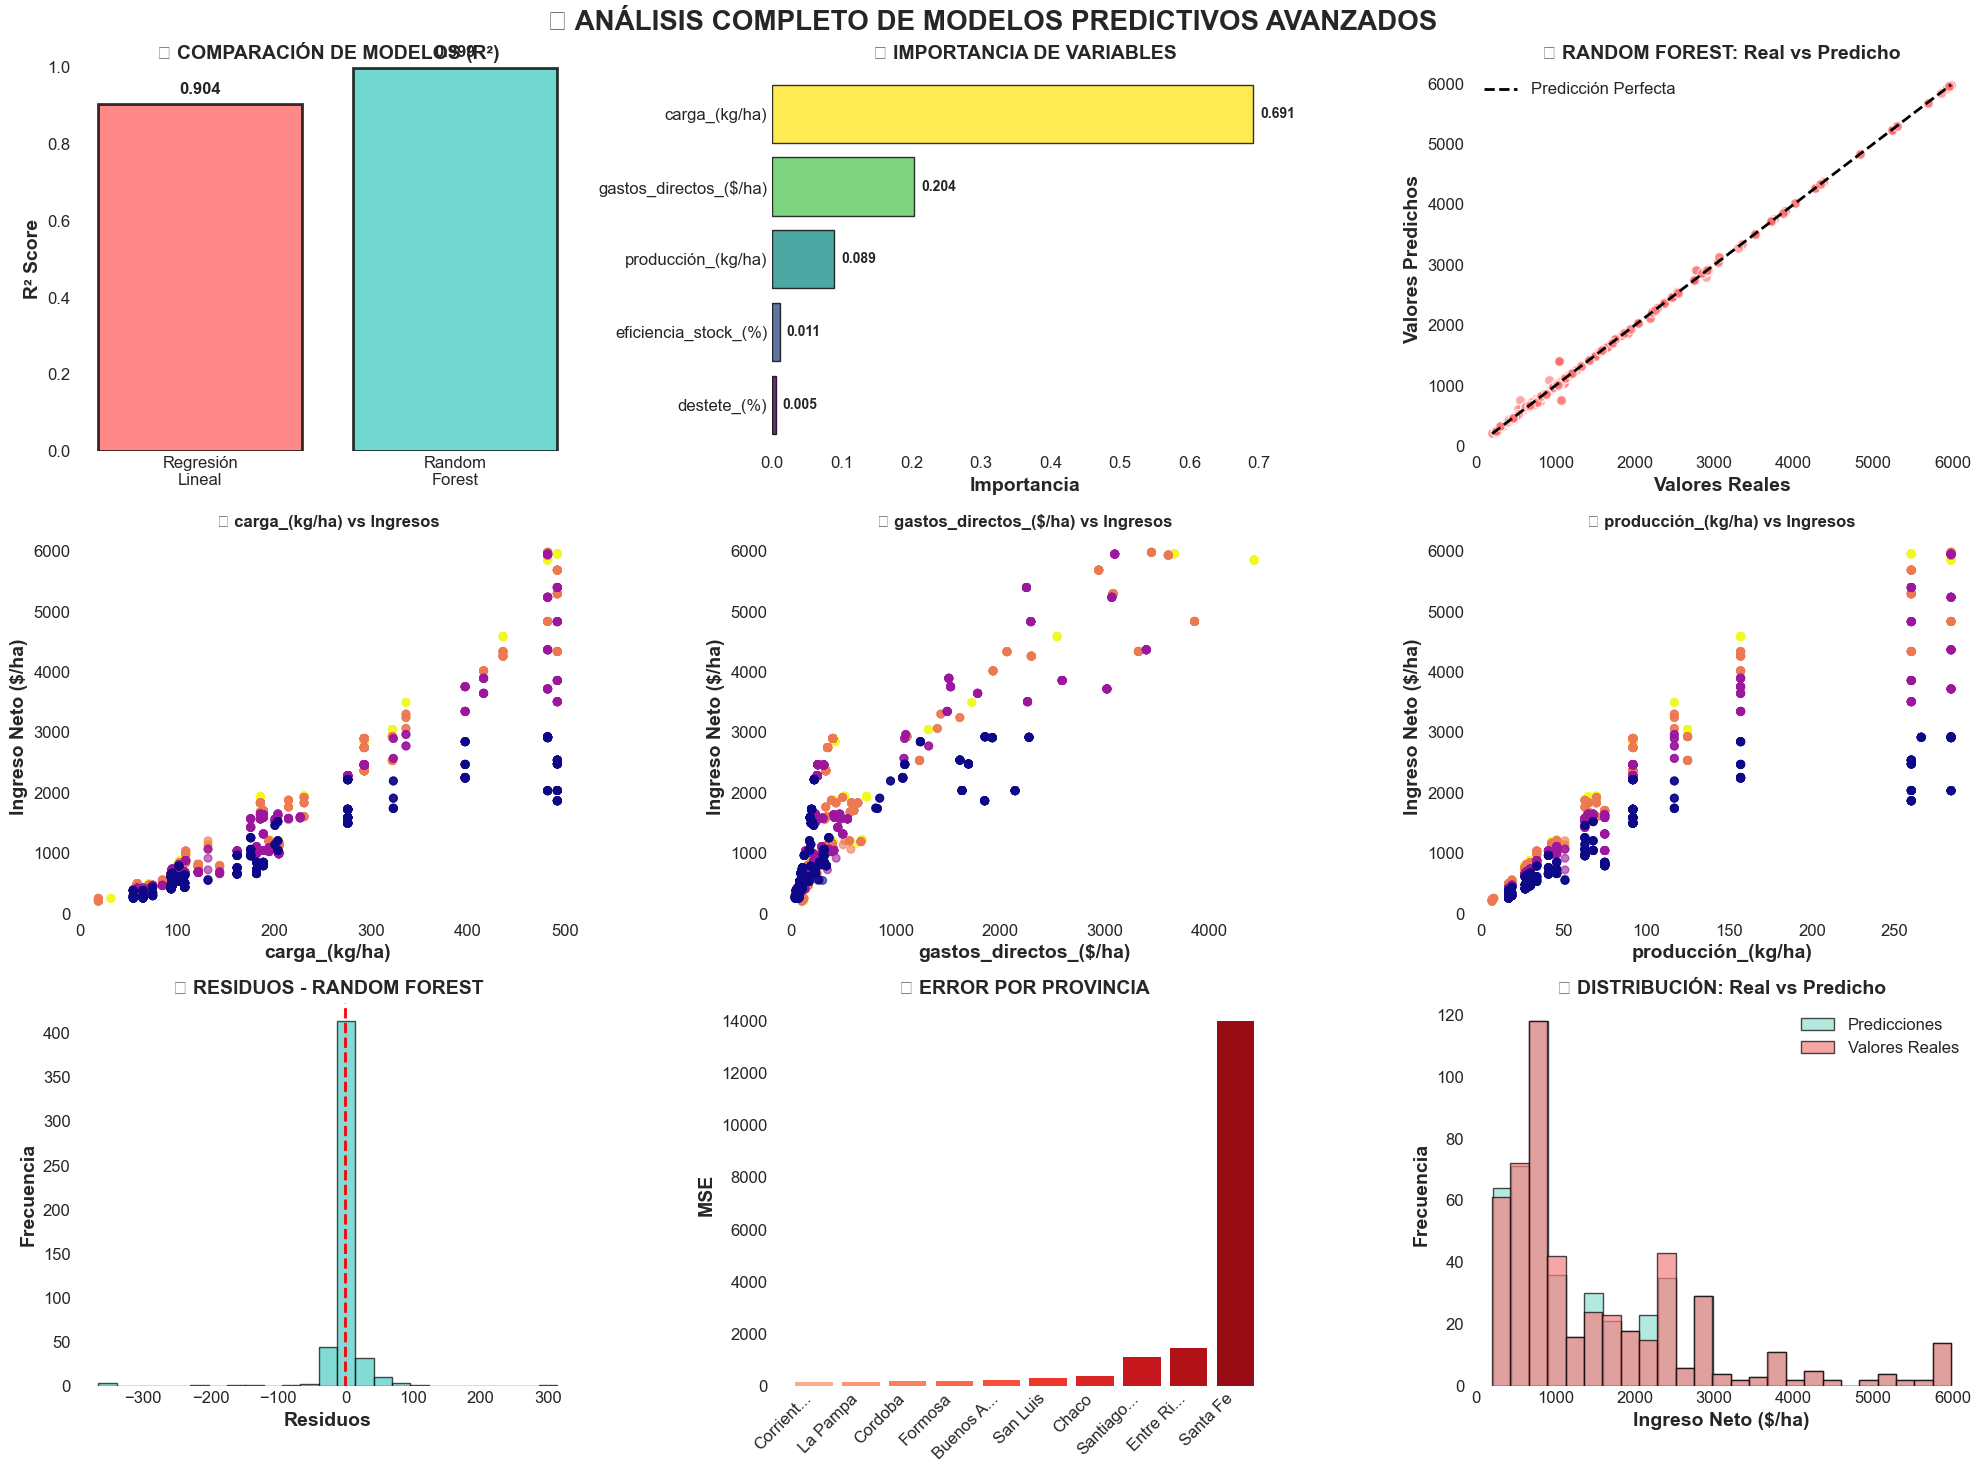

🏆 RESULTADOS FINALES - COMPARACIÓN DE MODELOS
📊 REGRESIÓN LINEAL MÚLTIPLE:
   • R² Score: 0.9035 (90.35%)
   • MSE: 167,859.82

🌲 RANDOM FOREST:
   • R² Score: 0.9989 (99.89%)
   • MSE: 1,852.62

🏅 GANADOR: Random Forest
📈 Mejora: 9.54 puntos porcentuales

🎯 TOP 3 VARIABLES MÁS IMPORTANTES:
   1. carga_(kg/ha): 0.6913
   2. gastos_directos_($/ha): 0.2042
   3. producción_(kg/ha): 0.0888


In [23]:
# 🚀 MODELO AVANZADO: REGRESIÓN MÚLTIPLE Y RANDOM FOREST
print("🔬 Entrenando modelos avanzados con múltiples variables...")

# Seleccionar características
features = ['eficiencia_stock_(%)', 'producción_(kg/ha)', 'destete_(%)', 'carga_(kg/ha)', 'gastos_directos_($/ha)']
X_multi = df[features]
y_multi = df['ingreso_neto_($/ha)']

# División de datos
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi, y_multi, test_size=0.2, random_state=42)

# Escalado para regresión lineal
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_multi)
X_test_scaled = scaler.transform(X_test_multi)

# Entrenar modelos
lr_multi = LinearRegression()
lr_multi.fit(X_train_scaled, y_train_multi)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
rf_model.fit(X_train_multi, y_train_multi)

# Predicciones
y_pred_lr = lr_multi.predict(X_test_scaled)
y_pred_rf = rf_model.predict(X_test_multi)

# Métricas
mse_lr = mean_squared_error(y_test_multi, y_pred_lr)
r2_lr = r2_score(y_test_multi, y_pred_lr)
mse_rf = mean_squared_error(y_test_multi, y_pred_rf)
r2_rf = r2_score(y_test_multi, y_pred_rf)

# Visualización épica
fig = plt.figure(figsize=(20, 15))

# 1. Comparación de modelos
ax1 = plt.subplot(3, 3, 1)
models = ['Regresión\nLineal', 'Random\nForest']
r2_scores = [r2_lr, r2_rf]
colors = ['#FF6B6B', '#4ECDC4']
bars = ax1.bar(models, r2_scores, color=colors, alpha=0.8, edgecolor='black', linewidth=2)
ax1.set_title('🏆 COMPARACIÓN DE MODELOS (R²)', fontsize=14, fontweight='bold')
ax1.set_ylabel('R² Score', fontweight='bold')
ax1.set_ylim(0, 1)
# Agregar valores en las barras
for bar, score in zip(bars, r2_scores):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
             f'{score:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=12)
ax1.grid(axis='y', alpha=0.3)

# 2. Importancia de características
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=True)

ax2 = plt.subplot(3, 3, 2)
colors_importance = plt.cm.viridis(np.linspace(0, 1, len(features)))
bars_imp = ax2.barh(feature_importance['feature'], feature_importance['importance'], 
                    color=colors_importance, alpha=0.8, edgecolor='black')
ax2.set_title('🎯 IMPORTANCIA DE VARIABLES', fontsize=14, fontweight='bold')
ax2.set_xlabel('Importancia', fontweight='bold')
# Agregar valores
for bar, importance in zip(bars_imp, feature_importance['importance']):
    ax2.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
             f'{importance:.3f}', va='center', fontweight='bold', fontsize=10)

# 3. Predicciones vs Reales - Random Forest
ax3 = plt.subplot(3, 3, 3)
ax3.scatter(y_test_multi, y_pred_rf, alpha=0.6, color='#FF6B6B', s=50, edgecolors='white')
ax3.plot([y_test_multi.min(), y_test_multi.max()], [y_test_multi.min(), y_test_multi.max()], 
         'k--', lw=2, label='Predicción Perfecta')
ax3.set_title('🎯 RANDOM FOREST: Real vs Predicho', fontsize=14, fontweight='bold')
ax3.set_xlabel('Valores Reales', fontweight='bold')
ax3.set_ylabel('Valores Predichos', fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4-6. Análisis de cada variable importante
important_features = feature_importance.sort_values('importance', ascending=False).head(3)
for i, (idx, row) in enumerate(important_features.iterrows()):
    ax = plt.subplot(3, 3, 4 + i)
    feature_name = row['feature']
    scatter = ax.scatter(df[feature_name], df['ingreso_neto_($/ha)'], 
                        c=df['año'], cmap='plasma', alpha=0.6, s=30)
    ax.set_title(f'📊 {feature_name} vs Ingresos', fontsize=12, fontweight='bold')
    ax.set_xlabel(feature_name, fontweight='bold')
    ax.set_ylabel('Ingreso Neto ($/ha)', fontweight='bold')
    ax.grid(True, alpha=0.3)

# 7. Residuos Random Forest
ax7 = plt.subplot(3, 3, 7)
residuos_rf = y_test_multi - y_pred_rf
ax7.hist(residuos_rf, bins=25, color='#4ECDC4', alpha=0.7, edgecolor='black')
ax7.axvline(residuos_rf.mean(), color='red', linestyle='--', linewidth=2)
ax7.set_title('📊 RESIDUOS - RANDOM FOREST', fontsize=14, fontweight='bold')
ax7.set_xlabel('Residuos', fontweight='bold')
ax7.set_ylabel('Frecuencia', fontweight='bold')
ax7.grid(True, alpha=0.3)

# 8. Error por provincias TOP 10
top_provinces = df.groupby('provincia')['ingreso_neto_($/ha)'].mean().sort_values(ascending=False).head(10).index
province_errors = []
for prov in top_provinces:
    prov_data = df[df['provincia'] == prov]
    if len(prov_data) > 10:  # Solo si hay suficientes datos
        X_prov = prov_data[features]
        y_prov = prov_data['ingreso_neto_($/ha)']
        pred_prov = rf_model.predict(X_prov)
        error_prov = mean_squared_error(y_prov, pred_prov)
        province_errors.append((prov, error_prov))

if province_errors:
    province_errors.sort(key=lambda x: x[1])
    ax8 = plt.subplot(3, 3, 8)
    provs, errors = zip(*province_errors)
    ax8.bar(range(len(provs)), errors, color=plt.cm.Reds(np.linspace(0.3, 0.9, len(provs))))
    ax8.set_title('🎯 ERROR POR PROVINCIA', fontsize=14, fontweight='bold')
    ax8.set_xticks(range(len(provs)))
    ax8.set_xticklabels([p[:8] + '...' if len(p) > 8 else p for p in provs], rotation=45, ha='right')
    ax8.set_ylabel('MSE', fontweight='bold')

# 9. Distribución de predicciones
ax9 = plt.subplot(3, 3, 9)
ax9.hist(y_pred_rf, bins=25, alpha=0.7, color='#95E1D3', edgecolor='black', label='Predicciones')
ax9.hist(y_test_multi, bins=25, alpha=0.7, color='#F38181', edgecolor='black', label='Valores Reales')
ax9.set_title('📈 DISTRIBUCIÓN: Real vs Predicho', fontsize=14, fontweight='bold')
ax9.set_xlabel('Ingreso Neto ($/ha)', fontweight='bold')
ax9.set_ylabel('Frecuencia', fontweight='bold')
ax9.legend()
ax9.grid(True, alpha=0.3)

plt.suptitle('🤖 ANÁLISIS COMPLETO DE MODELOS PREDICTIVOS AVANZADOS', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

# Resultados finales
print("=" * 80)
print("🏆 RESULTADOS FINALES - COMPARACIÓN DE MODELOS")
print("=" * 80)
print(f"📊 REGRESIÓN LINEAL MÚLTIPLE:")
print(f"   • R² Score: {r2_lr:.4f} ({r2_lr*100:.2f}%)")
print(f"   • MSE: {mse_lr:,.2f}")
print()
print(f"🌲 RANDOM FOREST:")
print(f"   • R² Score: {r2_rf:.4f} ({r2_rf*100:.2f}%)")
print(f"   • MSE: {mse_rf:,.2f}")
print()

mejor_modelo = "Random Forest" if r2_rf > r2_lr else "Regresión Lineal"
mejora = abs(r2_rf - r2_lr) * 100

print(f"🏅 GANADOR: {mejor_modelo}")
print(f"📈 Mejora: {mejora:.2f} puntos porcentuales")
print()
print("🎯 TOP 3 VARIABLES MÁS IMPORTANTES:")
for i, (_, row) in enumerate(feature_importance.sort_values('importance', ascending=False).head(3).iterrows(), 1):
    print(f"   {i}. {row['feature']}: {row['importance']:.4f}")
print("=" * 80)